# Forest Cover Classification Using SGD

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('covtype.csv')
data_set.shape

(581012, 55)

In [4]:
# Checking for null values in the dataset
data_set.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['Cover_Type']

In [6]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((435759, 54), (145253, 54))

In [7]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Finding the Best Parameters Using Halving Grid Search

In [8]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [9]:
from sklearn.linear_model import SGDClassifier

In [12]:
# Defining the parameter grid
param_grid = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'], 
    'penalty': ['l2', 'l1', 'elasticnet'],
    'l1_ratio': [0.25, 0.5, 1.0],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'max_iter': [250, 500],        
    'eta0': [0, 1, 10, 100],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']          
}

In [13]:
halving_search = HalvingGridSearchCV(estimator=SGDClassifier(random_state=0),
                                     param_grid=param_grid,
                                     cv=5,
                                     factor=4,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search.fit(X_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 106
max_resources_: 435759
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 4320
n_resources: 106
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4050 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4050 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 930, in fit
    self._more_validate_params()
  File "d:\Python\Lib\si

----------
iter: 1
n_candidates: 1080
n_resources: 424
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.55952381 0.55952381 0.55952381]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.63834808 0.63834808 0.63834808]
  warnings.warn(


----------
iter: 2
n_candidates: 270
n_resources: 1696
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan ... 0.6879056 0.6879056 0.6879056]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.71769912 0.71769912 0.71769912]
  warnings.warn(


----------
iter: 3
n_candidates: 68
n_resources: 6784
Fitting 5 folds for each of 68 candidates, totalling 340 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.70722714 0.70722714 0.70722714]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [      nan       nan       nan ... 0.7175972 0.7175972 0.7175972]
  warnings.warn(


----------
iter: 4
n_candidates: 17
n_resources: 27136
Fitting 5 folds for each of 17 candidates, totalling 85 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.71214299 0.71428045 0.71428045]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.71217063 0.71429888 0.71429888]
  warnings.warn(


----------
iter: 5
n_candidates: 5
n_resources: 108544
Fitting 5 folds for each of 5 candidates, totalling 25 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.71380136 0.71484245 0.71484245]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.71379743 0.7148454  0.7148454 ]
  warnings.warn(


----------
iter: 6
n_candidates: 2
n_resources: 434176
Fitting 5 folds for each of 2 candidates, totalling 10 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.71484245 0.71400867 0.71400867]
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [      nan       nan       nan ... 0.7148454 0.7142306 0.7142306]
  warnings.warn(


HalvingGridSearchCV(estimator=SGDClassifier(random_state=0), factor=4,
                    n_jobs=-1,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                'eta0': [0, 1, 10, 100],
                                'l1_ratio': [0.25, 0.5, 1.0],
                                'learning_rate': ['constant', 'optimal',
                                                  'invscaling', 'adaptive'],
                                'loss': ['hinge', 'squared_hinge',
                                         'perceptron'],
                                'max_iter': [250, 500],
                                'penalty': ['l2', 'l1', 'elasticnet']},
                    verbose=3)

In [14]:
# Best parameters found by HalvingGridSearchCV
print('Best score:',halving_search.best_score_)
print('Best parameters found:',halving_search.best_params_)

Best score: 0.7140086725121936
Best parameters found: {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 1.0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 250, 'penalty': 'l2'}


### Visualizing the Results

In [15]:
results = pd.DataFrame(halving_search.cv_results_)

sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'].values[sorted_indices]
sorted_params = results['params'].values[sorted_indices]

top_params = [str(params) for params in sorted_params[:10]]
top_scores = [str(sc) for sc in sorted_scores[:10]]
param_lb = []
for i in range(1,11):
    param_lb.append('Parameter Combination ' + str(i))

print('Top 10 Parameter Combinations:')
for i in range(len(top_params)):
    print('Parmeter Combination',i+1)
    print(top_params[i])
    print('Score:',top_scores[i])
    print()

Top 10 Parameter Combinations:
Parmeter Combination 1
{'alpha': 0.0001, 'eta0': 100, 'l1_ratio': 0.5, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 250, 'penalty': 'l2'}
Score: 0.65

Parmeter Combination 2
{'alpha': 0.01, 'eta0': 0, 'l1_ratio': 0.25, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 500, 'penalty': 'elasticnet'}
Score: 0.5952380952380951

Parmeter Combination 3
{'alpha': 0.01, 'eta0': 10, 'l1_ratio': 0.25, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'max_iter': 250, 'penalty': 'elasticnet'}
Score: 0.6023809523809524

Parmeter Combination 4
{'alpha': 0.01, 'eta0': 100, 'l1_ratio': 1.0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'elasticnet'}
Score: 0.6761904761904762

Parmeter Combination 5
{'alpha': 0.01, 'eta0': 10, 'l1_ratio': 1.0, 'learning_rate': 'invscaling', 'loss': 'squared_hinge', 'max_iter': 250, 'penalty': 'l2'}
Score: 0.5785714285714285

Parmeter Combination 6
{'alpha': 0.01, 'eta0': 1, 'l1_rat

d:\Python\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


## Designing the SGD Classifier Model with the Optimal Hyperparameters

In [16]:
best_sgd_clf = halving_search.best_estimator_

# Making predictions with the best estimator
y_train_pred = best_sgd_clf.predict(X_train) # type: ignore
y_test_pred = best_sgd_clf.predict(X_test) # type: ignore

In [17]:
# Computing the performance metrics for the training subset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy*100,3))
print("Training Precision (in %):",round(train_precision*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1*100,3)) # type: ignore

Training Accuracy (in %): 71.412
Training Precision (in %): 69.955
Training Recall (in %): 71.412
Training F1 Score (in %): 69.913


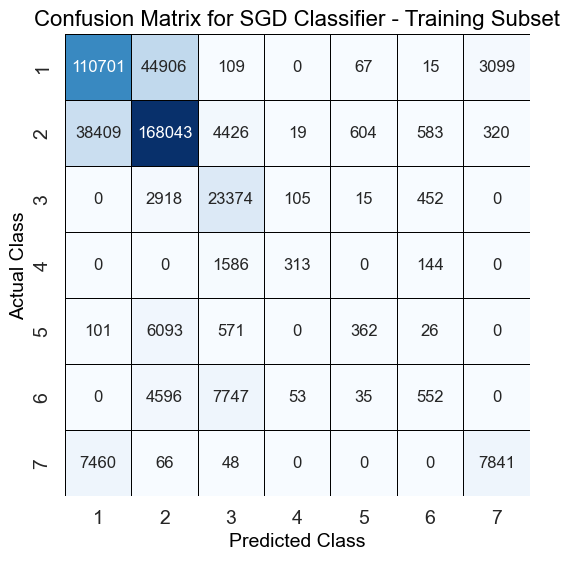

In [18]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_sgd_clf.classes_, yticklabels=best_sgd_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SGD Classifier - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

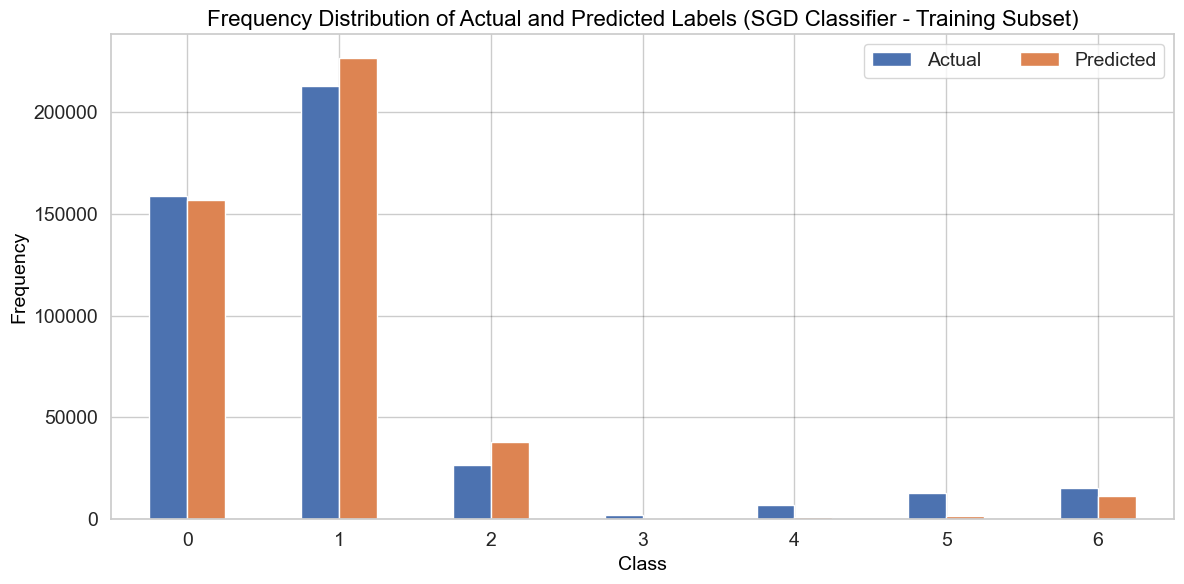

In [19]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train, predicted_counts_train = np.unique(y_train_pred, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (SGD Classifier - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) # type: ignore
fig.tight_layout()
plt.show()

In [21]:
# Computing the performance metrics for the test subset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy*100,3))
print("Test Precision (in %):",round(test_precision*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1*100,3)) # type: ignore

Test Accuracy (in %): 71.364
Test Precision (in %): 70.015
Test Recall (in %): 71.364
Test F1 Score (in %): 69.879


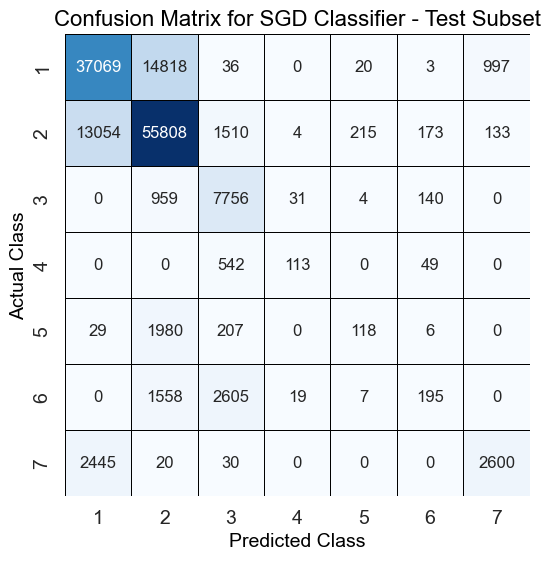

In [22]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_sgd_clf.classes_, yticklabels=best_sgd_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SGD Classifier - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

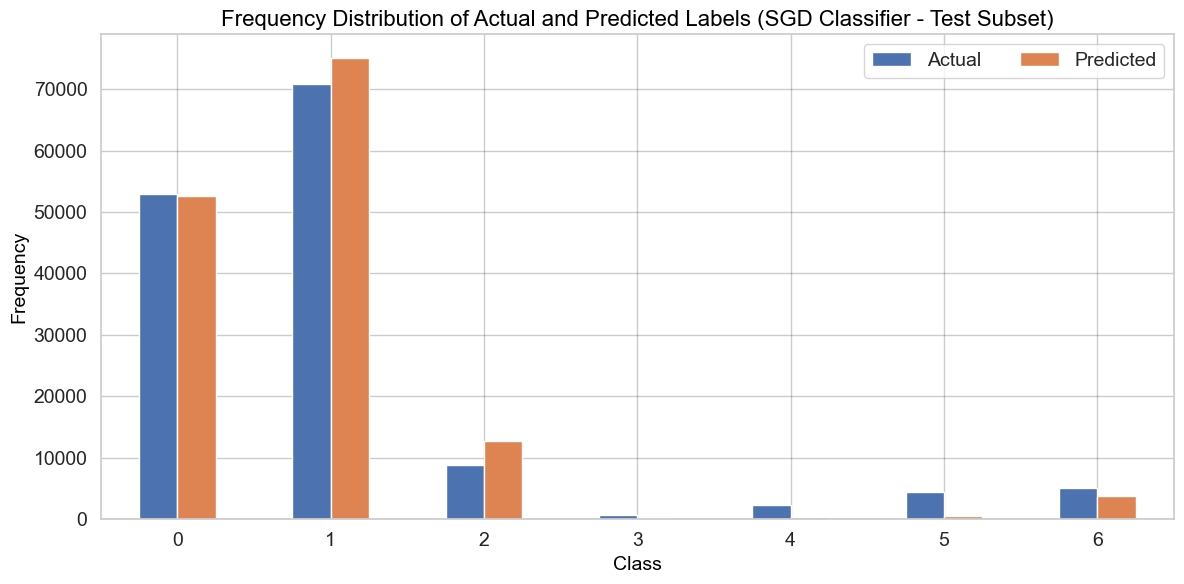

In [23]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test, predicted_counts_test = np.unique(y_test_pred, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (SGD Classifier - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) # type: ignore
fig.tight_layout()
plt.show()

In [24]:
import joblib

# Saving the model
joblib.dump(best_sgd_clf, 'StochasticGradientDescent_ForestCover.pkl')

['StochasticGradientDescent_ForestCover.pkl']

***